<a href="https://colab.research.google.com/github/szhang12345/MSDS-422-Assignment-6-Neural-Networks/blob/main/Assignment6_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### **MSDS 422 Assignment 6: Neural Networks**

**By Siying Zhang**

**Topic: Digit Recognizer**


# Ingest

In [ ]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import tensorflow.compat.v1 as tf
import datetime
import os.path

Reading Data

In [ ]:
# Load training and testing data directly from TensorFlow and convert datatype
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# EDA

In [ ]:
# check the pandas DataFrame object training data
print('\nGeneral description of train set:')
print(train.info())

print('\nDescriptive statistics of train set:')
print(train.describe())


General description of train set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

Descriptive statistics of train set:
              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
coun

In [ ]:
#test and train set shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Training data shape (60000, 784)


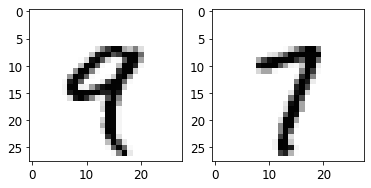

In [ ]:
print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[4].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[96].reshape(28, 28), cmap=plt.cm.Greys);

# Modeling

Dictionary for result tracking

In [ ]:
# Initialize a dictionary to track results
metrics = {}

# Metrics for evaluation
names = ['Number of Hidden Layers', 'Nodes per Layer', 'Processing Time',
         'Training Set Accuracy', 'Test Set Accuracy']


Parameters Setting

In [ ]:
# Set fixed parameters
n_epochs = 20
batch_size = 50
learning_rate = 0.01


# Function that creates batch generator used in training
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch


Model 1: 2 Hidden Layers with 50 Nodes per Layer

In [ ]:
# Start timer
start = datetime.datetime.now()

n_hidden = 50

# Reset the session
tf.disable_v2_behavior()
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

# Set X and y placeholders
X = tf.placeholder(tf.float32, shape=(None, 784), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, 10, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})

# Record the time it takes
duration = datetime.datetime.now() - start

metrics['Model 1'] = [2, n_hidden, duration, acc_train, acc_test]



C:\Users\siying\anaconda3\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
C:\Users\siying\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Model 2: 2 Hidden Layers with 100 Nodes per Layer

In [ ]:
# Start timer
start = datetime.datetime.now()

n_hidden = 100

# Reset the session
tf.disable_v2_behavior()
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

# Set X and y placeholders
X = tf.placeholder(tf.float32, shape=(None, 784), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, 10, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})

# Record the time it takes
duration = datetime.datetime.now() - start

metrics['Model 2'] = [2, n_hidden, duration, acc_train, acc_test]


Model 3: 7 Hidden Layers with 50 Nodes per Layer


In [ ]:
# Start timer
start = datetime.datetime.now()

n_hidden = 50

# Reset the session
tf.disable_v2_behavior()
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

# Set X and y placeholders
X = tf.placeholder(tf.float32, shape=(None, 784), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden, name="hidden3",
                              activation=tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, n_hidden, name="hidden4",
                              activation=tf.nn.relu)
    hidden5 = tf.layers.dense(hidden4, n_hidden, name="hidden5",
                              activation=tf.nn.relu)
    hidden6 = tf.layers.dense(hidden5, n_hidden, name="hidden6",
                              activation=tf.nn.relu)
    hidden7 = tf.layers.dense(hidden6, n_hidden, name="hidden7",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden7, 10, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})

# Record the time it takes
duration = datetime.datetime.now() - start

metrics['Model 3'] = [7, n_hidden, duration, acc_train, acc_test]



Model 4: 7 Hidden Layers with 100 Nodes per Layer


In [ ]:
# Start timer
start = datetime.datetime.now()

n_hidden = 100

# Reset the session
tf.disable_v2_behavior()
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

# Set X and y placeholders
X = tf.placeholder(tf.float32, shape=(None, 784), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden, name="hidden3",
                              activation=tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, n_hidden, name="hidden4",
                              activation=tf.nn.relu)
    hidden5 = tf.layers.dense(hidden4, n_hidden, name="hidden5",
                              activation=tf.nn.relu)
    hidden6 = tf.layers.dense(hidden5, n_hidden, name="hidden6",
                              activation=tf.nn.relu)
    hidden7 = tf.layers.dense(hidden6, n_hidden, name="hidden7",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden7, 10, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})

# Record the time it takes
duration = datetime.datetime.now() - start

metrics['Model 4'] = [7, n_hidden, duration, acc_train, acc_test]



In [ ]:
# Convert metrics dictionary to dataframe for display
results = pd.DataFrame.from_dict(metrics, orient='index')
results.columns = names

# Sort by model number
results.reset_index(inplace=True)
results.sort_values(by=['index'], axis=0, inplace=True)
results.set_index(['index'], inplace=True)
results.index.name = None
results


,Number of Hidden Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
Model 1,2,50,0 days 00:00:31.015670,0.967650,0.9595
Model 2,2,100,0 days 00:00:38.652061,0.975217,0.9682
Model 3,7,50,0 days 00:00:41.632629,0.985667,0.9674
Model 4,7,100,0 days 00:01:02.379867,0.993350,0.9727


# Conclusion

**Background and management problem description**

Continue work on the Digit Recognition problem to test neural network structures within a benchmark experiment. Using the conclusion from bench mark study to recommend the most trustworthy neural network typology and hyperparameter settings to the financial institution evaluating machine learning technologies for optical character recognition.

**Research design and modeling methods**

Apply the TensorFlow library instead of SciKit Learn’s Random Forest Classifier to build a model that successfully assigns a digit that is equal to the handwritten one. The steps for the analysis are the following: 1) Build a ‘Deep Neural Network’ (DNN) model using TensorFlow 2) Train & test various designs of the model using ‘hidden layers’ 3) Time the model build and record the train/test accuracy 4) Compare the model timing, train accuracy and test accuracy

**Results and Recommendations**

Below is a summary of the models that were created in the process of this analysis and their performance comparison. Performance variables include processing time and the accuracy scores of training & test sets.

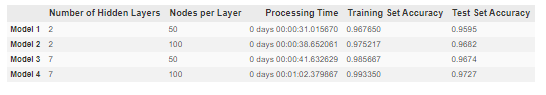

The recommendation is to use Model 2. Although it takes longer to train than Model 1, the accuracy of the test predictions is higher than Model 1. On the other hand, it takes shorter to train than Model 3 while providing better accuracy of test set than Model 3. Compared with Model 4, though the test set accuracy is lower, it takes much shorter time to process. And Model 4 with 0.99 training set accuracy, which might indicate overfitting. Therefore, I would recommend Model 2 with 2 hidden layers and 100 nodes per layer to be the most trustworthy DNN setting in this benchmark experiment, compared with other three models. Also, compared with Assignment 5 using Random Forest Classifier, the accuracy and processing time are both improved using Tensorflow DNN.